In [1]:
#Assignment 2, Part 1

# Importing required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#Reading information from 'TrainData.csv' 
PATH= '/Users/rituka/Downloads/WindEnergyForecasting-Assignment2/'
file_name= 'TrainData.csv' 
train_data = pd.read_csv(PATH + file_name)

In [4]:
#showing the information of the first records of trainset
train_data.head()

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120,0.765355,-4.486657,4.551468
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797,0.469875,-3.213752,3.247920
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140,-0.020893,-2.418119,2.418209
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362,-0.444867,-2.149654,2.195203
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698,-0.838274,-1.991829,2.161038


In [4]:
#Choosing timestamp ,wind speed and wind power generation to generate a new trainset for Part1
train_data_1= train_data[[ 'TIMESTAMP','WS10', 'POWER']]

In [6]:
train_data_1.head()

,TIMESTAMP,WS10,POWER
0,20120101 1:00,3.699120,0.273678
1,20120101 2:00,2.696797,0.086796
2,20120101 3:00,2.030140,0.006811
3,20120101 4:00,1.847362,0.018646
4,20120101 5:00,1.824698,0.034812


In [7]:
#Checking if the trainset has any Null value
train_data_1.isnull().sum()

TIMESTAMP    0
WS10         0
POWER        0
dtype: int64

In [5]:
#Reading the weather information for the test set from 'WeatherForecastInput.csv' file
test_name='WeatherForecastInput.csv'
test_weather_data = pd.read_csv(PATH + test_name)

In [9]:
test_weather_data.head()

,TIMESTAMP,U10,V10,WS10,U100,V100,WS100
0,20131101 1:00,3.462251,-1.066374,3.622753,4.323671,-1.330859,4.523861
1,20131101 2:00,3.651341,-0.337717,3.666925,4.532444,-0.451426,4.554870
2,20131101 3:00,3.657829,0.328049,3.672510,4.527268,0.341374,4.540120
3,20131101 4:00,3.551698,0.735371,3.627028,4.395563,0.818799,4.471175
4,20131101 5:00,3.586921,1.050811,3.737673,4.461128,1.251971,4.633475


In [11]:
#Choosing  timestamp and wind speed  from test_weather_data 

test_data_wind=test_weather_data[['TIMESTAMP','WS10']]

In [8]:
#Reading power generation data and timestamp from 'Solution.csv' 
test_name_power='Solution.csv'
test_data_power=pd.read_csv(PATH + test_name_power)

In [9]:
test_data_power.head()

,TIMESTAMP,POWER
0,20131101 1:00,0.167215
1,20131101 2:00,0.063998
2,20131101 3:00,0.039035
3,20131101 4:00,0.036232
4,20131101 5:00,0.064888


In [12]:
#Create a testset from feature set(wind speed) and target set(power generation)  for Part1
test_data_1= pd.merge(test_data_wind,test_data_power, on='TIMESTAMP')

In [13]:

test_data_1.head()

,TIMESTAMP,WS10,POWER
0,20131101 1:00,3.622753,0.167215
1,20131101 2:00,3.666925,0.063998
2,20131101 3:00,3.672510,0.039035
3,20131101 4:00,3.627028,0.036232
4,20131101 5:00,3.737673,0.064888


In [14]:
train_data_1.shape

(16080, 3)

In [15]:
test_data_1.shape

(720, 3)

In [16]:
#Specifying the second column (WS10:wind speed) as the feature set(X) and last column (POWER:power generation) 
#as the target(y ) for both train and test sets

X_train=train_data_1.values[:,1]
y_train=train_data_1.values[:,-1]

X_test=test_data_1.values[:,1]
y_test=test_data_1.values[:,-1]

In [17]:
#Reshaping the 1 dimentional array to be used in ML algorithms
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [18]:
#Creating and fitting a linear regression model to the training data
    
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#Test the performance of the trained model on the test data
#Make predictions using test data
predictions_1_linear= LR_model.predict(X_test)



In [20]:
#Calculating RMSE
def print_scores(y_test,y_pred, model):
    rmse= np.sqrt(mean_squared_error(y_test,y_pred))    
    print(" Root Mean squared error for %s is %.4f"% (model,rmse))
    return rmse

In [21]:
rmse_LR=print_scores(y_test,predictions_1_linear, 'Linear Regression')

 Root Mean squared error for Linear Regression is 0.2164


In [22]:

PATH= '/Users/rituka/Downloads/WindEnergyForecasting-Assignment2/'
file_name= 'ForecastTemplate.csv' 
tempelate_result = pd.read_csv(PATH + file_name)

In [23]:
def create_results(temp,pred):
    
    temp['FORECAST']=pred
    return temp

In [24]:
Forecast_LR=create_results(tempelate_result,predictions_1_linear)
Forecast_LR.to_csv('/Users/rituka/Documents/results/ForecastTemplate1_LR.csv',index=False)

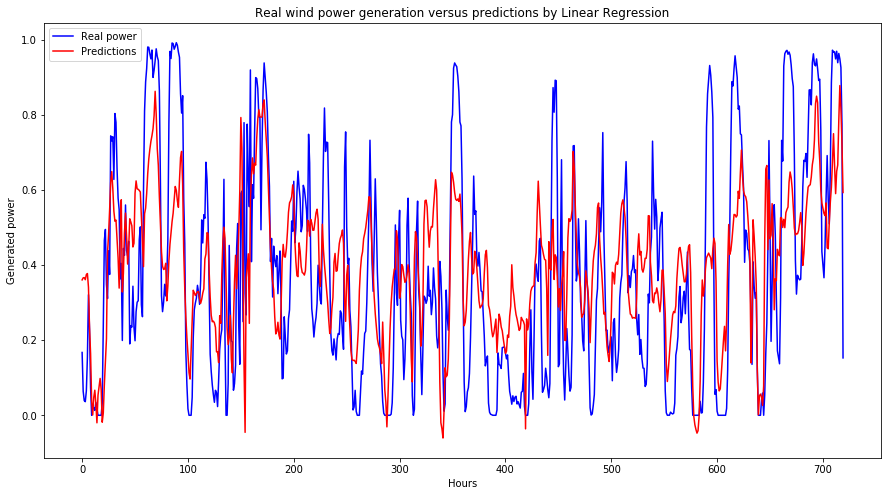

In [25]:
#Plotting predictions against real values of wind power generration
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(predictions_1_linear, color= 'red', label='Predictions')
power_changes.set_title('Real wind power generation versus predictions by Linear Regression')
power_changes.legend(loc='best')

In [26]:
#k- nearest neighbor (kNN)
from sklearn.neighbors import KNeighborsRegressor
n_neighbors= 7
#making the model
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
#fitting
knn.fit(X_train,y_train)
#predicting
predictions_knn= knn.predict(X_test)

In [27]:
rmse_knn=print_scores(y_test,predictions_knn, 'kNN')



 Root Mean squared error for kNN is 0.2318


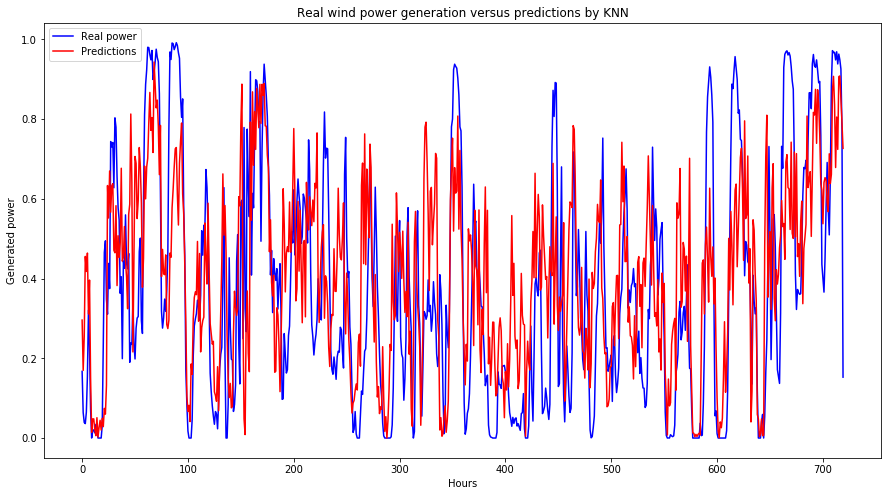

In [29]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(predictions_knn, color= 'red', label='Predictions')
power_changes.set_title('Real wind power generation versus predictions by KNN')
power_changes.legend(loc='best')

In [30]:
Forecast_knn=create_results(tempelate_result,predictions_knn)
Forecast_knn.to_csv('/Users/rituka/Documents/results/ForecastTemplate1-kNN.csv',index=False)

In [31]:
#Support Vector Regression

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
y_svr_rbf = svr_rbf.predict(X_test)

In [33]:
rmse_svr=print_scores(y_test,y_svr_rbf, 'Support Vector Regression')



 Root Mean squared error for Support Vector Regression is 0.2142


In [ ]:
#predictions_svrRBF_df=pd.DataFrame(y_svr_rbf, index=test_data_1.index )
#predictions_svrRBF_df['predicted_power']=predictions_svrRBF_df[0]
#predictions_svrRBF_df.drop(0, axis=1, inplace=True)

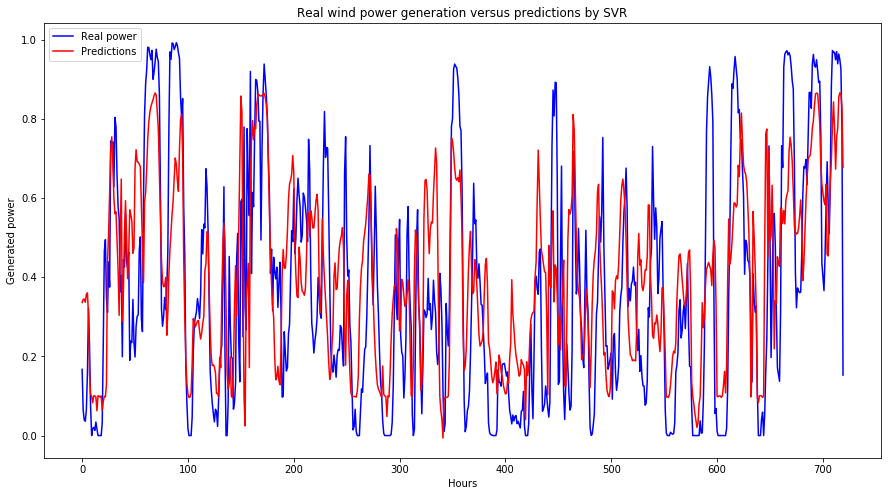

In [34]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(y_svr_rbf, color= 'red', label='Predictions')
power_changes.set_title('Real wind power generation versus predictions by SVR')
power_changes.legend(loc='best')

In [35]:
#Creating a dataframe and a csv file for Storing the results
Forecast_svr=create_results(tempelate_result,y_svr_rbf)
Forecast_svr.to_csv('/Users/rituka/Documents/results/ForecastTemplate1-SVR.csv',index=False)

In [36]:
#ANN
# For normalizing dataset, we use scaling method, as ADAM optimizer works well when the input features are scaled.
 
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
#Setting seed for reproducibility
import random
random.seed( 30 )
#Creating an ANN with one hidden layer with 10 neurons, batch size=50, epochs=70, optimizer=adam
def create_model(num_neurons, X, y):
    model_ann = Sequential()
    #To define number of input variables and the hidden layer
    model_ann.add(Dense(num_neurons, input_dim= X.shape[1], activation='relu'))
    #To add another layer
    #model_ann.add(Dense(10, kernel_initializer='normal', activation='relu'))
    
    #To create output layer
    model_ann.add(Dense(1, kernel_initializer='normal'))
    model_ann.compile(loss='mean_squared_error', optimizer='adam')
    #To fit the model on the training set
    model_ann.fit(X, y, epochs=70, batch_size=50, verbose=2)
    
    return model_ann
  
#number of neurons in the hidden layer
num_neurons= 10
model_ann=create_model(num_neurons, X_train_scaled, y_train)

Epoch 1/70
 - 1s - loss: 0.1477
Epoch 2/70
 - 0s - loss: 0.0761
Epoch 3/70
 - 0s - loss: 0.0609
Epoch 4/70
 - 0s - loss: 0.0545
Epoch 5/70
 - 0s - loss: 0.0536
Epoch 6/70
 - 0s - loss: 0.0535
Epoch 7/70
 - 0s - loss: 0.0535
Epoch 8/70
 - 0s - loss: 0.0535
Epoch 9/70
 - 0s - loss: 0.0535
Epoch 10/70
 - 0s - loss: 0.0535
Epoch 11/70
 - 0s - loss: 0.0535
Epoch 12/70
 - 0s - loss: 0.0535
Epoch 13/70
 - 0s - loss: 0.0534
Epoch 14/70
 - 0s - loss: 0.0535
Epoch 15/70
 - 0s - loss: 0.0535
Epoch 16/70
 - 0s - loss: 0.0535
Epoch 17/70
 - 0s - loss: 0.0535
Epoch 18/70
 - 0s - loss: 0.0535
Epoch 19/70
 - 0s - loss: 0.0535
Epoch 20/70
 - 0s - loss: 0.0534
Epoch 21/70
 - 0s - loss: 0.0534
Epoch 22/70
 - 0s - loss: 0.0535
Epoch 23/70
 - 0s - loss: 0.0534
Epoch 24/70
 - 0s - loss: 0.0535
Epoch 25/70
 - 0s - loss: 0.0534
Epoch 26/70
 - 0s - loss: 0.0534
Epoch 27/70
 - 0s - loss: 0.0534
Epoch 28/70
 - 0s - loss: 0.0534
Epoch 29/70
 - 0s - loss: 0.0535
Epoch 30/70
 - 0s - loss: 0.0534
Epoch 31/70
 - 0s -

In [45]:
#Predicting the testset
ann_pred = model_ann.predict(X_test_scaled)


In [46]:
rmse_ANN=print_scores(y_test,ann_pred, 'ANN')




 Root Mean squared error for ANN is 0.2158


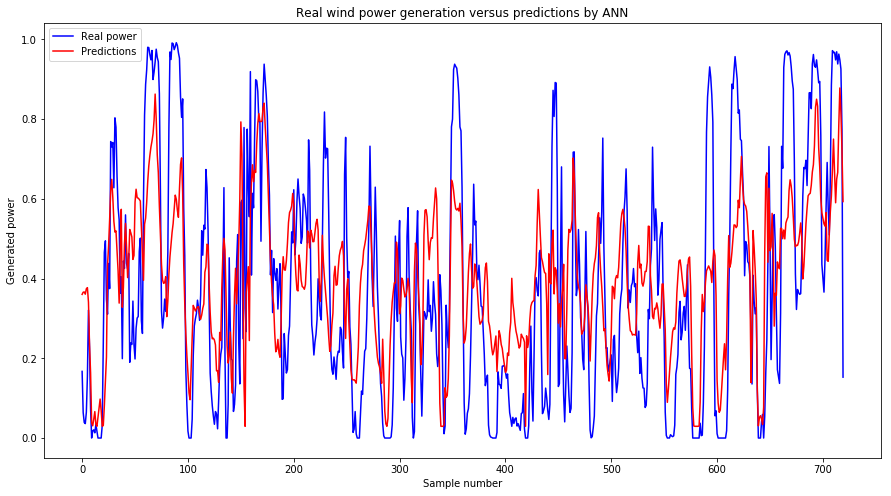

In [47]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Sample number')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(ann_pred, color= 'red', label='Predictions')
power_changes.set_title('Real wind power generation versus predictions by ANN')
power_changes.legend(loc='best')

In [48]:
#Creating a dataframe and a csv file for Storing the results
Forecast_ann=create_results(tempelate_result,y_svr_rbf)
Forecast_ann.to_csv('/Users/rituka/Documents/results/ForecastTemplate1-NN.csv',index=False)